In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats
from matplotlib import pyplot as plt
from patsy import dmatrices

In [ ]:
url = 'https://raw.githubusercontent.com/czartur/map433/main/dm2/data_Titanic.csv'
df = pd.read_csv(url)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Data cleaning
# NA age receives mean of age
df = df.fillna(value={'Age': df.Age.mean()})
# Introduisant des variables "muettes"
#df = pd.get_dummies(df, columns= ['Sex', 'Pclass'])
df = df.replace(['male', 'female'], [0,1])
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.000000      1   
2                               Heikkinen, Miss. Laina    1  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.000000      1   
4                             Allen, Mr. William Henry    0  35.000000      0   
..                                                 ...  .

In [ ]:
decedes = df[df['Survived']==0]['Survived'].count()

print('Nombre de passagers décédés:', decedes)
print('Proportion de passagers décédés:', str(round((decedes/df.Survived.count())*100, 2))+'%')

Nombre de passagers décédés: 549
Proportion de passagers décédés: 61.62%


In [ ]:
proportions_sex = df.groupby('Survived').mean()

print(proportions_sex.Sex)

Survived
0    0.147541
1    0.681287
Name: Sex, dtype: float64


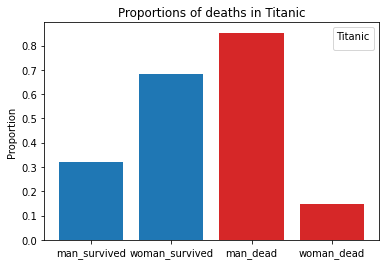

In [ ]:
fig, ax = plt.subplots()
data = ['man_survived', 'woman_survived', 'man_dead', 'woman_dead']
counts = [1-proportions_sex['Sex'][1], proportions_sex['Sex'][1], 1-proportions_sex['Sex'][0], proportions_sex['Sex'][0]]
bar_colors = ['tab:blue', 'tab:blue', 'tab:red', 'tab:red']
ax.bar(data, counts, color=bar_colors)
ax.set_ylabel('Proportion')
ax.set_title('Proportions of deaths in Titanic')
ax.legend(title='Titanic')
plt.show()

À partir de ces observations, nous pouvons conclure que si vous étiez un homme sur le Titanic, le risque de mourir était plus élevé.

In [ ]:
print(df.groupby(['Pclass']).mean()['Survived'])
print(df.groupby(['Survived', 'Pclass'])['Survived'].count())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Survived, dtype: int64


Ces observations nous permettent de conclure que le taux de mortalité des passagers de première classe était nettement inférieur à celui des passagers de troisième classe. Les personnes issues de la première classe sont plus nombreuses à avoir survécu que celles issues de la troisième classe, ce dernier chiffre étant environ 2,5 fois plus élevé.


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000


A partir de cette matrice de covariance, nous pouvons étendre l'analyse faite précédemment, en notant qu'il existe une relation négative entre le Sex et la Pclass, ce qui signifie qu'en général, les femmes avaient des classes plus petites et peuvent donc biaiser les relations observées pour les variables uniques faites précédemment.
De plus, nous pouvons observer qu'en fait, Pclass et Sex influencent inversement et proportionnellement, respectivement, comme dit précédemment.

Une autre variable qui a une corrélation importante avec Survived est Fare, qui a une corrélation négative avec Pclass (ce qui est attendu, puisque les petites classes sont généralement plus chères).

In [ ]:
# Creating dmatrix
y, X = dmatrices('Survived ~ Age + SibSp + Parch + Fare + Sex + Pclass', data=df, return_type='dataframe')

In [ ]:
X

,Intercept,Age,SibSp,Parch,Fare,Sex,Pclass
0,1.0,22.000000,1.0,0.0,7.2500,0.0,3.0
1,1.0,38.000000,1.0,0.0,71.2833,1.0,1.0
2,1.0,26.000000,0.0,0.0,7.9250,1.0,3.0
3,1.0,35.000000,1.0,0.0,53.1000,1.0,1.0
4,1.0,35.000000,0.0,0.0,8.0500,0.0,3.0
...,...,...,...,...,...,...,...
886,1.0,27.000000,0.0,0.0,13.0000,0.0,2.0
887,1.0,19.000000,0.0,0.0,30.0000,1.0,1.0
888,1.0,29.699118,1.0,2.0,23.4500,1.0,3.0
889,1.0,26.000000,0.0,0.0,30.0000,0.0,1.0


In [ ]:
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.442607
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Sun, 16 Oct 2022   Pseudo R-squ.:                  0.3353
Time:                        18:10:20   Log-Likelihood:                -394.36
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 7.794e-83
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1975      0.480      4.580      0.000       1.257       3.138
Age           -0.0397      0.

In [ ]:
print(dir(result))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_data_in_cache', '_get_endog_name', '_get_robustcov_results', '_use_t', 'aic', 'bic', 'bse', 'conf_int', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'f_test', 'fittedvalues', 'get_margeff', 'initialize', 'k_constant', 'llf', 'llnull', 'llr', 'llr_pvalue', 'load', 'mle_retvals', 'mle_settings', 'model', 'nobs', 'normalized_cov_params', 'params', 'pred_table', 'predict', 'prsquared', 'pvalues', 'remove_data', 'resid_dev', 'resid_generalized', 'resid_pearson', 'resid_response', 'save', 'scale', 'set_null_options', 'summary', 'summary2', 't_test', 't_test_pairwise', 'tvalues', 'use_t', 'wald_t

In [ ]:
def h(x):
  return (np.exp(x)/(np.exp(x)+1))/(np.exp(x)+1)

def calculate_diagW(teta, X):
  return np.diag(h(X.dot(teta)))

def calculate_phi(teta, X):
  x = np.dot(X,teta)
  return np.exp(x)/(np.exp(x)+1)

p = X.shape[1]  
teta = np.ones(p)*0.003

In [ ]:
def calculate_teta_mv(X, y, rho=1e-10):
  X = X.to_numpy() 
  y = y.to_numpy().flatten()
  n, p = X.shape
  teta = np.zeros(p)*0.03
  W = calculate_diagW(teta,X)
  phi = calculate_phi(teta,X)
  while np.linalg.norm(np.dot(X.transpose(), y-phi)) >= rho:
    z = X.dot(teta) + np.linalg.inv(W).dot(y-phi)
    F = np.linalg.inv(np.linalg.multi_dot([X.transpose(), W, X])) 
    teta = np.linalg.multi_dot([F, X.transpose(), W, z])
    W = calculate_diagW(teta,X)
    phi = calculate_phi(teta,X)
  return teta

print(calculate_teta_mv(X, y))
teta_chute = (result.conf_int(alpha=0.05).to_numpy()[:,0] + result.conf_int(alpha=0.05).to_numpy()[:,1])/2

[ 2.19751524 -0.03970162 -0.35072475 -0.1119633   0.00285183  2.76293003
 -1.08429733]


In [ ]:
def F(teta, X):
  W = calculate_diagW(teta, X)
  return np.linalg.multi_dot([X.transpose(), W, X])

def calculate_conf_interval(X, y, alpha = 0.05):
  teta_mv = calculate_teta_mv(X, y)
  n = X.shape[0]
  beta = np.diag(np.linalg.inv(F(teta_mv, X)/n))
  q = scipy.stats.norm.ppf(1-alpha/2)

  interval = []
  for k in np.arange(X.shape[1]):
    interval.append([teta_mv[k] - np.sqrt(n/beta[k])*q, teta_mv[k] + np.sqrt(n/beta[k])*q])
  return interval

def calculate_p_value(X, y, alpha = 0.05):
  teta_mv = calculate_teta_mv(X,y)
  n = X.shape[0]
  beta = np.diag(np.linalg.inv(F(teta_mv, X)/n))

  p_val = []
  for k in np.arange(X.shape[1]):
    Fr = scipy.stats.norm.cdf(np.abs(teta_mv[k])*np.sqrt(n/beta[k]))
    p_val.append([2-2*Fr])
  return p_val


print(calculate_conf_interval(X,y))

[[-1.8877018690371772, 6.28273235399278], [-251.40056629947873, 251.3211630503331], [-18.241432881736085, 17.539983376023496], [-16.806651939883025, 16.582725345110397], [-829.970778309526, 829.9764819601886], [-7.085593221568273, 12.611453290872852], [-15.172694408447622, 13.00409974880149]]


In [ ]:
print(X.columns, "\n", calculate_p_value(X,y))

Index(['Intercept', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Pclass'], dtype='object') 
 [[4.6419183610257875e-06], [3.549761211640856e-07], [0.0013674083347348098], [0.340242046538465], [0.22718401556931567], [0.0], [6.439293542825908e-15]]


**Réponse:**

 6. La p-valeur du test est de 0.34024, qui est beaucoup plus grand que 0.05, et, donc, on ne peut pas réjéter l'hypothèse $β_{parch} = 0$, et, alors, on peut concluire que la variable n'est pas statistiquement signifiant pour notre analyse.



In [ ]:
# Confidence interval for alpha=0.05
print(result.conf_int(alpha=0.05).to_numpy())

[[ 1.25718362e+00  3.13784686e+00]
 [-5.49842694e-02 -2.44189797e-02]
 [-5.65442851e-01 -1.36006655e-01]
 [-3.42063954e-01  1.18137359e-01]
 [-1.77658536e-03  7.48023602e-03]
 [ 2.37287574e+00  3.15298433e+00]
 [-1.35696560e+00 -8.11629063e-01]]


In [ ]:
y2, X2 = dmatrices('Survived ~ Age + SibSp  + Fare + Sex + Pclass', data=df, return_type='dataframe')
model = sm.Logit(y2, X2)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.443127
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Sun, 16 Oct 2022   Pseudo R-squ.:                  0.3346
Time:                        18:10:24   Log-Likelihood:                -394.83
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.312e-83
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2160      0.478      4.638      0.000       1.280       3.152
Age           -0.0394      0.

In [ ]:
print(calculate_conf_interval(X2,y2))

[[-1.8864908868870138, 6.318408040166178], [-252.17758915525962, 252.098818842267], [-18.83203330017505, 18.074742092179584], [-870.9099344827833, 870.9146802043102], [-7.347361642140827, 12.800178019759292], [-15.304015914953196, 13.107637805460916]]


In [ ]:
print(X2.columns, "\n",calculate_p_value(X2,y2))

Index(['Intercept', 'Age', 'SibSp', 'Fare', 'Sex', 'Pclass'], dtype='object') 
 [[3.5132381495106557e-06], [4.048223014585517e-07], [0.00036384024525548675], [0.2917073835374464], [0.0], [1.7763568394002505e-15]]


**Réponse:**



  7. On voit que l'intervalle de confiance augmente pour toutes les variables, mais de façon négligeable pour la plupart d'entre elles.

**Réponse:**

8. La p-valeur de $β_{fare}$ est de 0,291, et, de la même façon de la question 6. on peut concluire que ce paramètre n'est pas statistiquement signifiant

In [ ]:
y3, X3 = dmatrices('Survived ~ Age + SibSp + Sex + Pclass', data=df, return_type='dataframe')
model = sm.Logit(y3, X3)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.443796
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Sun, 16 Oct 2022   Pseudo R-squ.:                  0.3336
Time:                        18:10:26   Log-Likelihood:                -395.42
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.236e-84
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4522      0.424      5.779      0.000       1.621       3.284
Age           -0.0398      0.

In [ ]:
print(calculate_p_value(X3,y3))
print(calculate_conf_interval(X3,y3))

[[7.511889332789679e-09], [2.8794125550568594e-07], [0.0005834542700073886], [0.0], [0.0]]
[[-2.1669031748732497, 7.0712425703736965], [-252.76948810322756, 252.6899017659586], [-19.197670529916802, 18.482093701022006], [-7.355689427949155, 12.835301740603114], [-17.542925970848113, 15.198144099511337]]


**Réponse:**

  9. On voit que l'intervalle de confiance augmente pour toutes les variables, mais de façon négligeable pour la plupart d'entre elles.

In [ ]:
X_test = pd.DataFrame(
    { "Age": [22, 22],
     "SibSp": [0,0],
     "Sex": [0, 1],
     "Pclass": [1, 1],
   "Survived": [0, 0],
    }
)
y_test2, X_test2  = dmatrices('Survived ~ Age + SibSp + Sex + Pclass', data=X_test, return_type='dataframe')
y_result = result.predict(X_test2)
print(y_result)

0    0.599727
1    0.958677
dtype: float64
